In [1]:
import snntorch as snn
import torch
import torch.nn as nn
from snntorch import spikeplot as splt
from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import network
import torch.optim as optim
import os
from PIL import Image
import torchvision.transforms.functional as TF
import cv2
import pandas as pd
import time
import data as dt
from scipy.stats import norm, rayleigh


# os.environ["CUDA_LAUNCH_BLOCKING"] = "1" # for debugging on GPU
%load_ext autoreload
%autoreload 2

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


torch.cuda.empty_cache()

Using cuda device


# Video Dataset

In [3]:
dataset_folder = 'cropped_classical_tracking_dataset'
csv_path = os.path.join(dataset_folder, 'labels.csv')
image_dir = os.path.join(dataset_folder, 'frames')
quantization = 8
label_quantization = 8
trainratio, testratio, valratio = 0.9, 0.05, 0.05
trainset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='train', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio)
trainloader = DataLoader(trainset, batch_size=3, collate_fn=trainset.collate_fn, shuffle=True)


Loaded 1862 rows from cropped_classical_tracking_dataset\labels.csv
Found 22 sequences in cropped_classical_tracking_dataset\labels.csv


KeyError: 'x_cam'

In [3]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 1
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train')
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test')
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val')
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23


8

In [4]:
# Create testloader
testset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='test', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio) 
testloader = DataLoader(testset, batch_size=3, collate_fn=testset.collate_fn, shuffle=False)

Loaded 1862 rows from cropped_classical_tracking_dataset\labels.csv
Found 22 sequences in cropped_classical_tracking_dataset\labels.csv
Shape of the images: torch.Size([2, 51, 85])
Label shape: (85, 51)
Filtered to 14 rows for dataset type: ball
Split sizes: train=12, val=0, test=2, total=14
Final dataset split='test' size: 2


In [5]:
valset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='val', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio)
validationloader = DataLoader(valset, batch_size=3, collate_fn=valset.collate_fn, shuffle=False)

Loaded 1862 rows from cropped_classical_tracking_dataset\labels.csv
Found 22 sequences in cropped_classical_tracking_dataset\labels.csv
Shape of the images: torch.Size([2, 51, 85])
Label shape: (85, 51)
Filtered to 14 rows for dataset type: ball
Split sizes: train=12, val=0, test=2, total=14
Final dataset split='val' size: 0


In [ ]:
model = network.SCNN_Video_Tracker_Class(trainset).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.start_training(testloader, optimizer, device, validationloader=valid_loader, num_steps=7, num_epochs=50)
network.save_model(model)

Flattened feature size: 14080
Number of x_cam bins: 160
Number of y_cam bins: 90
Number of R_cam bins: 100
[160, 90, 100]
tensor([[[90., 88., 10.]]], device='cuda:0')
[160, 90, 100]
tensor([[[93., 87., 11.]]], device='cuda:0')
[160, 90, 100]
tensor([[[95., 86., 11.]]], device='cuda:0')
[160, 90, 100]
tensor([[[98., 85., 11.]]], device='cuda:0')
[160, 90, 100]
tensor([[[101.,  85.,  12.]]], device='cuda:0')
[160, 90, 100]
tensor([[[104.,  84.,  12.]]], device='cuda:0')
[160, 90, 100]
tensor([[[108.,  84.,  13.]]], device='cuda:0')
[160, 90, 100]
tensor([[[111.,  83.,  13.]]], device='cuda:0')
[160, 90, 100]
tensor([[[115.,  83.,  14.]]], device='cuda:0')
[160, 90, 100]
tensor([[[120.,  82.,  15.]]], device='cuda:0')
[160, 90, 100]
tensor([[[125.,  82.,  15.]]], device='cuda:0')
[160, 90, 100]
tensor([[[130.,  82.,  16.]]], device='cuda:0')
[160, 90, 100]
tensor([[[136.,  82.,  17.]]], device='cuda:0')
[160, 90, 100]
tensor([[[142.,  83.,  18.]]], device='cuda:0')
[160, 90, 100]
tensor([

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [7]:
csv_path = os.path.join(dataset_path, f'positions_{accumulation_time}ms.csv')
df = pd.read_csv(csv_path)

In [10]:
print(df['x_cam'].max(), df['y_cam'].max(), df['R_cam'].max())
print(df['x_cam'].min(), df['y_cam'].min(), df['R_cam'].min())


1279.0 719.0 1058.0
1.0 -1134.0 15.984069241163892


In [375]:
error = network.evaluate_video_classification_tracker(model, testloader, device, num_steps=4)
np.linalg.norm(error).item()

Average X Error: 1.8582 pixels, Average Y Error: 3.0993 pixels


3.613633512911282

Error at 1 timesteps: 5.941933533454421
Error at 2 timesteps: 4.306605830580614
Error at 3 timesteps: 3.855997779734845
Error at 4 timesteps: 3.613633512911282
Error at 5 timesteps: 3.6659738429361024
Error at 6 timesteps: 3.61154501306843
Error at 7 timesteps: 3.6394106105347377
Error at 8 timesteps: 3.6468661636055058
Error at 9 timesteps: 3.6720401795907884


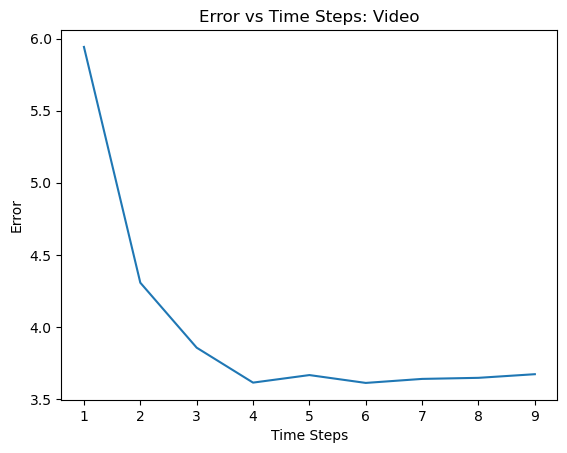

In [373]:
network.plot_timestep_curve(model, testloader, device, "Video", interval=[1, 10, 1])

In [25]:
model.training_params["num_epochs"] = 31

In [36]:
network.save_model(model)

Model saved at models/VideoTrackerClass_q8_20ts_30e.pt


In [175]:
video, labels, length = trainset[0]
print(trainset.data.iloc[0])

VideoName    13-38-07_18
Name: 8, dtype: object


In [162]:
trainset.frames

,Frame,X,Y,Radius,VideoName
0,13-47-09_7_0174,335,289,33,13-47-09_7
1,13-47-09_5_0070,543,224,37,13-47-09_5
2,13-38-07_6_0096,529,153,34,13-38-07_6
3,13-38-07_13_0125,448,237,15,13-38-07_13
4,13-47-09_6_0232,79,291,50,13-47-09_6
...,...,...,...,...,...
1857,13-38-07_14_0094,349,191,26,13-38-07_14
1858,13-47-09_2_0073,537,116,14,13-47-09_2
1859,13-38-07_5_0116,472,206,26,13-38-07_5
1860,13-38-07_5_0078,559,157,34,13-38-07_5


In [176]:
gen = dt.image_gen_for_video(video, labels)

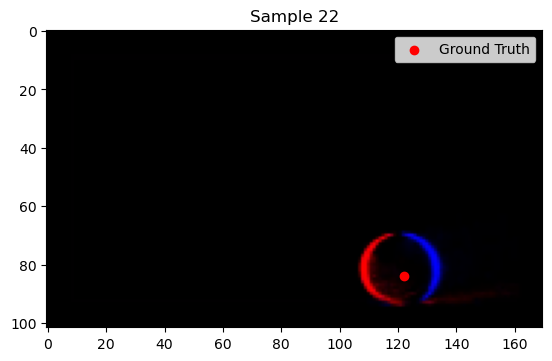

In [199]:
dt.show_next_img(gen)

X errors: μ=1.86, σ=1.80, 95% CI=4.826 pixels
Y errors: μ=3.10, σ=2.13, 95% CI=6.600 pixels
Total errors: σ=3.23, 95% CI=7.902 pixels


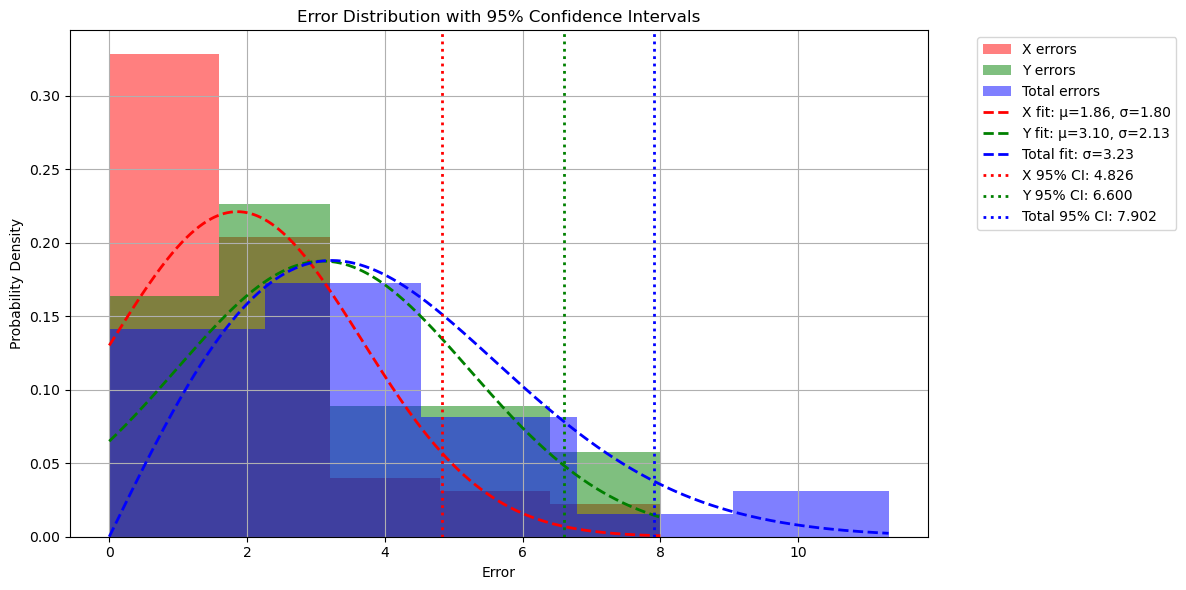

In [377]:
errors_x, errors_y = network.evaluate_video_classification_tracker(model, testloader, device, num_steps=4, operation = 'distribution')



X errors: μ=1.08, σ=1.00, 95% CI=2.730 pixels
Y errors: μ=1.44, σ=1.15, 95% CI=3.333 pixels
Total errors: σ=1.67, 95% CI=4.084 pixels


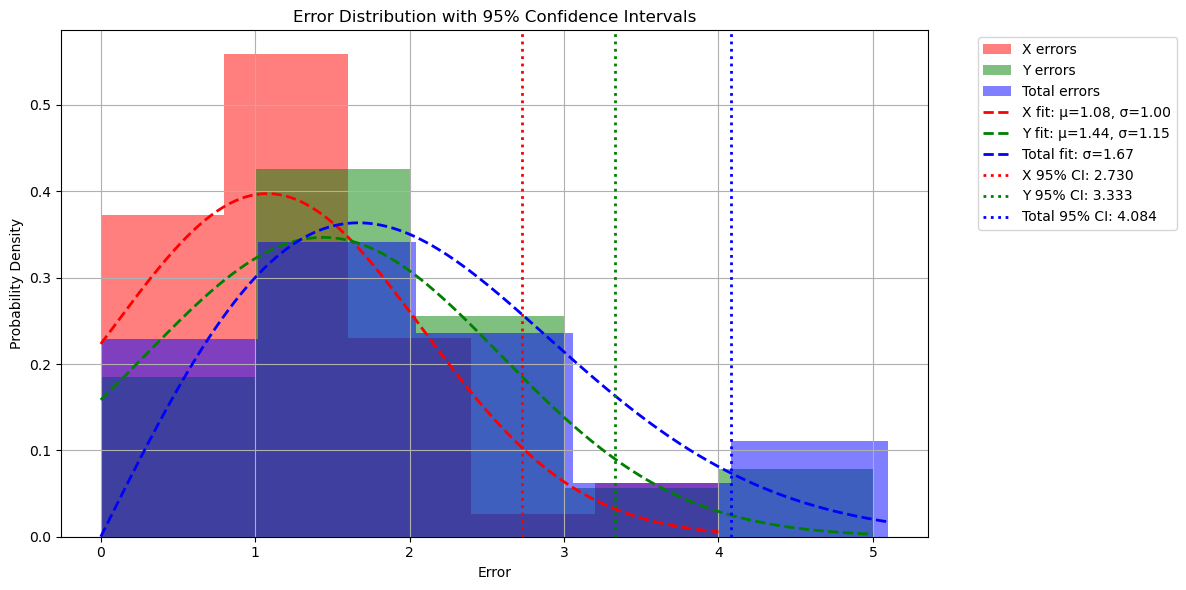

In [45]:
errors_x, errors_y = network.evaluate_video_classification_tracker(model, testloader, device, num_steps=20, operation = 'distribution')


In [10]:
def load_model(path, device):
    model = network.SCNN_Video_Tracker_Class(image_shape, bins_factor=bins_factor)
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.training_params = checkpoint['training_params']
    model.to(device)
    return model

In [ ]:
model = load_model('models/VideoTrackerClass_q8_20ts_30e.pt', device)

Flattened feature size: 3840
Number of x and y bins: 85, 51


C:\Users\realenriquem\AppData\Local\Temp\ipykernel_29320\1808180544.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [22]:
image_shape

torch.Size([2, 51, 85])

In [27]:
model = network.load_model('models/VideoTrackerClass_q8_20ts_30e.pt', network.SCNN_Video_Tracker_Class, device)

Flattened feature size: 3840
Number of x and y bins: 85, 51


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [17]:
inferenceloader = DataLoader(testset, batch_size=1, collate_fn=testset.collate_fn, shuffle=False)

In [21]:
t = network.measure_inference_time_per_image_for_videos(model, inferenceloader, device, num_steps=6)

Average inference time per image over 2 batches: 0.013958 seconds


In [ ]:
import cProfile
import pstats


profiler = cProfile.Profile()
profiler.enable()
t = network.measure_inference_time_per_image_for_videos(model, testloader, device, num_steps=6)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

Average inference time per image over 10 batches: 0.009342 seconds
         730583 function calls (695659 primitive calls) in 2.140 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    2.140    1.070 c:\Users\realenriquem\AppData\Local\anaconda3\envs\torch_with_cuda\lib\site-packages\IPython\core\interactiveshell.py:3514(run_code)
        2    0.000    0.000    2.140    1.070 {built-in method builtins.exec}
        1    0.000    0.000    2.140    2.140 C:\Users\realenriquem\AppData\Local\Temp\ipykernel_22984\739177592.py:7(<module>)
        1    0.001    0.001    2.140    2.140 c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1123(measure_inference_time_per_image_for_videos)
   5851/1    0.007    0.000    1.317    1.317 c:\Users\realenriquem\AppData\Local\anaconda3\envs\torch_with_cuda\lib\site-packages\torch\nn\modules\module.py:1732(_wrapped_call_impl)
 

# Plot Predicted vs Ground Truth Trajectory

In [79]:
def video_generator(testset): # This one just shows the data
    """Generator that yields video and labels one at a time."""
    for i in range(len(testset)):
        video, labels, length = testset[i]
        yield video, labels, length

def plot_pred_and_true_trajectories(model, gen = None, video_labels_length = None, agg = 'weighted_average', separate =False):
    if (gen is None) == (video_labels_length is None):
        raise ValueError("Exactly one of gen or video_labels_length must be provided")

    video, labels, length = next(gen) if gen else video_labels_length
    with torch.no_grad():
        logits_x, logits_y = model((video.unsqueeze(0).to(device), torch.tensor(length).unsqueeze(0).to(device)), num_steps_per_image=6)
        if agg == 'argmax':
            preds_x = torch.argmax(logits_x, dim=1).squeeze(0).cpu().numpy()
            preds_y = torch.argmax(logits_y, dim=1).squeeze(0).cpu().numpy()
        elif agg == 'weighted_average':
            probs_x = torch.softmax(logits_x, dim=1)  # shape: [1, time, num_bins]
            probs_y = torch.softmax(logits_y, dim=1)
            positions_x = torch.arange(probs_x.shape[1], device=probs_x.device).float().unsqueeze(0).unsqueeze(2)
            positions_y = torch.arange(probs_y.shape[1], device=probs_y.device).float().unsqueeze(0).unsqueeze(2)

            # Compute the weighted sum (expected value)
            # Multiply each prob dist with corresponding position and sum
            print(positions_x.shape, probs_x.shape)
            print(positions_y.shape, probs_y.shape)
            weighted_x = (probs_x * positions_x).sum(dim=1)  # shape: [1, time]
            weighted_y = (probs_y * positions_y).sum(dim=1)  # shape: [1, time]

            preds_x = weighted_x.squeeze(0).cpu().numpy()  # shape: [time]
            preds_y = weighted_y.squeeze(0).cpu().numpy()

        else:
            raise ValueError("Invalid aggregation method. Use 'argmax' or 'weighted_average'.")
        
    initial_frame = dt.tensor_to_image(video[0])
    height, width = initial_frame.shape[:2]
    if not separate:
        plt.figure(figsize=(10, 5))
        plt.imshow(initial_frame, cmap='gray')
        plt.plot(labels[:, 0], height - labels[:, 1], c='r', label='True Trajectory', alpha=0.7)
        plt.plot(preds_x, height - preds_y, c='y', label='Predicted Trajectory', alpha=0.7)
        plt.title('True vs. Predicted Trajectory')
        plt.legend()
        plt.show()
    else:
        # Plot true and predicted trajectories in different subplots
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(initial_frame, cmap='gray')
        axs[0].plot(labels[:, 0], height - labels[:, 1], c='r', label='True Trajectory')
        axs[0].set_title('True Trajectory')
        axs[0].legend()
        axs[1].imshow(initial_frame, cmap='gray')
        axs[1].plot(preds_x, height - preds_y, c='y', label='Predicted Trajectory')
        axs[1].set_title('Predicted Trajectory')
        axs[1].legend()
        plt.show()

def plot_probs_for_x_and_y(model, gen = None, video_labels_length = None, agg = 'weighted_average'):
    
    if (gen is None) == (video_labels_length is None):
        raise ValueError("Exactly one of gen or video_labels_length must be provided")

    video, labels, length = next(gen) if gen else video_labels_length

    with torch.no_grad():
        logits_x, logits_y = model((video.unsqueeze(0).to(device), torch.tensor(length).unsqueeze(0).to(device)), num_steps_per_image=6)
        probs_x = torch.softmax(logits_x, dim=1)  # shape: [1, time, num_bins]
        probs_y = torch.softmax(logits_y, dim=1)
        if agg == 'argmax':
            preds_x = torch.argmax(logits_x, dim=1).squeeze(0).cpu().numpy()
            preds_y = torch.argmax(logits_y, dim=1).squeeze(0).cpu().numpy()
        elif agg == 'weighted_average':
            width, height = probs_x.shape[1],probs_y.shape[1] 
            positions_x = torch.arange(width, device=probs_x.device).float().unsqueeze(0).unsqueeze(2)
            positions_y = torch.arange(height, device=probs_y.device).float().unsqueeze(0).unsqueeze(2)

            # Compute the weighted sum (expected value)
            # Multiply each prob dist with corresponding position and sum
            weighted_x = (probs_x * positions_x).sum(dim=1)  # shape: [1, time]
            weighted_y = (probs_y * positions_y).sum(dim=1)  # shape: [1, time]

            preds_x = weighted_x.squeeze(0).cpu().numpy()  # shape: [time]
            preds_y = weighted_y.squeeze(0).cpu().numpy()
        else:
            raise ValueError("Invalid aggregation method. Use 'argmax' or 'weighted_average'.")
    plt.figure(figsize=(10, 5))
    plt.imshow(probs_x.squeeze(0).cpu().numpy(), cmap='gray')
    plt.plot(labels[:, 0], c='r', label='True Trajectory', linewidth=0.5)
    # plt.plot(preds_x, c='g', label='Predicted Trajectory')
    plt.title('X probabilities')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('X position')

    plt.figure(figsize=(10, 5))
    plt.imshow(probs_y.squeeze(0).cpu().numpy(), cmap='gray')
    plt.plot(labels[:, 1], c='r', label='True Trajectory', linewidth=0.5)
    # plt.plot(preds_y, c='g', label='Predicted Trajectory')
    plt.colorbar()
    plt.title('Y probabilities')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Y position')
    plt.show()

In [73]:
model = network.load_model('models/VideoTrackerClass_q8_10ts_30e.pt', network.SCNN_Video_Tracker_Class, device)

Flattened feature size: 3840
Number of x and y bins: 85, 51


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [44]:
trainset[0][0][0][0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [50]:
gen = video_generator(trainset)

torch.Size([1, 85, 1]) torch.Size([1, 85, 81])
torch.Size([1, 51, 1]) torch.Size([1, 51, 81])


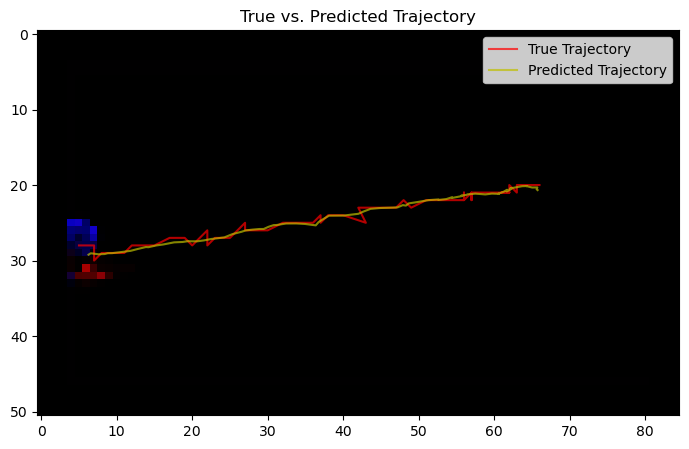

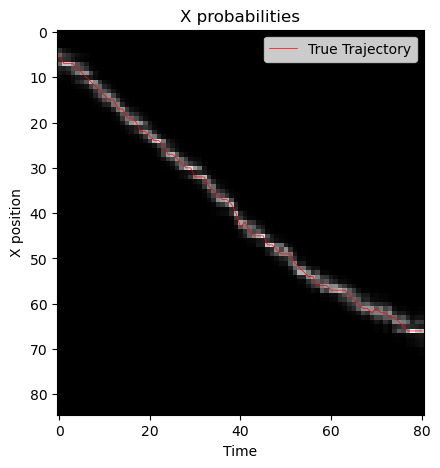

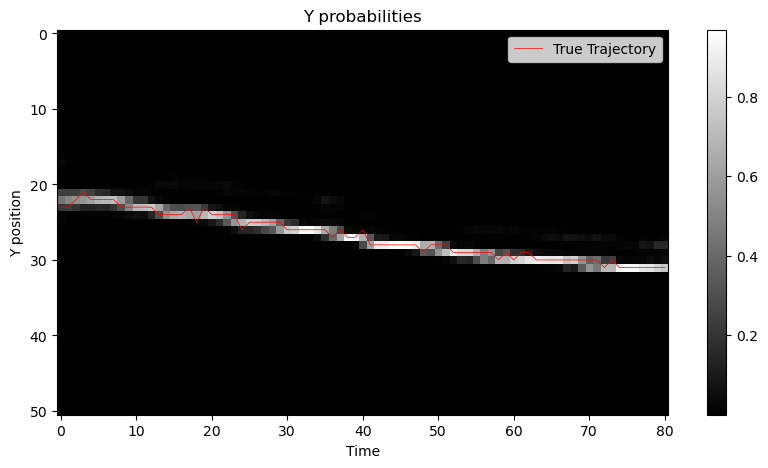

In [80]:
agg = 'weighted_average'
video_labels_length = next(gen)
plot_pred_and_true_trajectories(model, video_labels_length=video_labels_length, agg=agg, separate=False)
plot_probs_for_x_and_y(model, video_labels_length=video_labels_length, agg=agg)

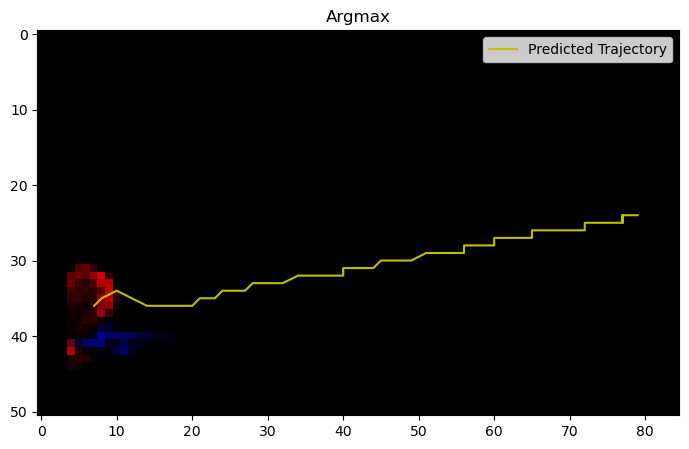

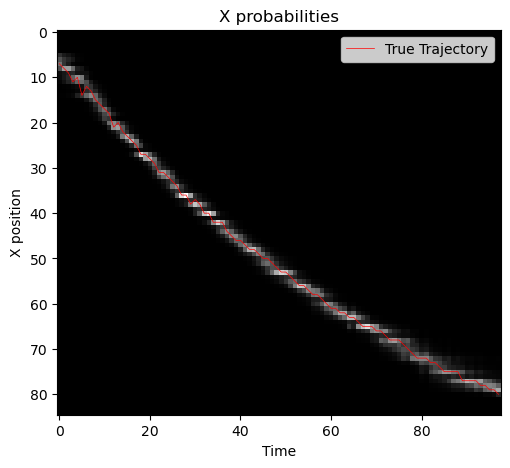

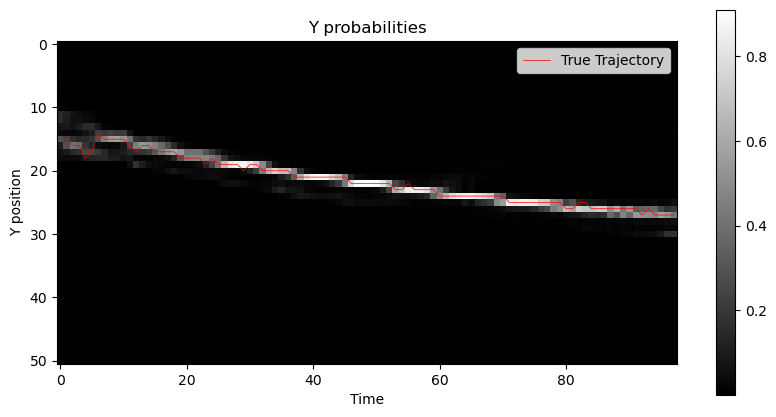

In [67]:
plot_pred_and_true_trajectories(model, video_labels_length=video_labels_length, agg = 'argmax')
plot_probs_for_x_and_y(model, video_labels_length=video_labels_length)

In [254]:
gen = dt.image_gen_for_video(video, labels)

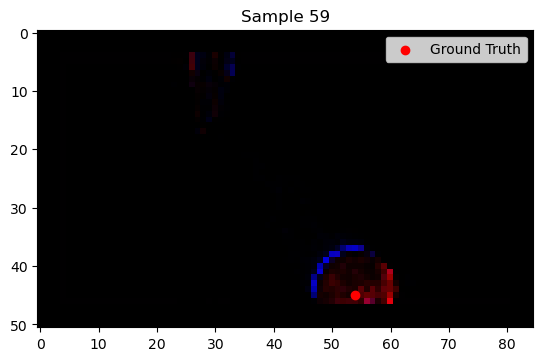

In [314]:
dt.show_next_img(gen)

# Weighted Average

In [4]:
quantization = 8
trainratio, testratio, valratio = 0.9, 0.05, 0.05
trainset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='train', dataset_type="ball", augment=False, quantization=quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio)
trainloader = DataLoader(trainset, batch_size=3, collate_fn=trainset.collate_fn, shuffle=True)
testset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='test', dataset_type="ball", augment=False, quantization=quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio)
testloader = DataLoader(testset, batch_size=3, collate_fn=testset.collate_fn, shuffle=False)

Loaded 1862 rows from cropped_classical_tracking_dataset\labels.csv
Found 22 sequences in cropped_classical_tracking_dataset\labels.csv
Shape of the images: torch.Size([2, 51, 85])
Label shape: (85, 51)
Filtered to 14 rows for dataset type: ball
Split sizes: train=12, val=0, test=2, total=14
Final dataset split='train' size: 12
Loaded 1862 rows from cropped_classical_tracking_dataset\labels.csv
Found 22 sequences in cropped_classical_tracking_dataset\labels.csv
Shape of the images: torch.Size([2, 51, 85])
Label shape: (85, 51)
Filtered to 14 rows for dataset type: ball
Split sizes: train=12, val=0, test=2, total=14
Final dataset split='test' size: 2


Epoch 1/10, Loss: 1.0803, Validation Error: 1.7472 pixels
Epoch 2/10, Loss: 1.0121, Validation Error: 1.7278 pixels
Epoch 3/10, Loss: 1.0001, Validation Error: 1.7078 pixels
Epoch 4/10, Loss: 1.0663, Validation Error: 1.6287 pixels
Epoch 5/10, Loss: 1.0252, Validation Error: 1.6753 pixels
Epoch 6/10, Loss: 1.0846, Validation Error: 1.7206 pixels
Epoch 7/10, Loss: 1.0138, Validation Error: 1.6404 pixels
Epoch 8/10, Loss: 1.1467, Validation Error: 1.5995 pixels
Epoch 9/10, Loss: 0.9203, Validation Error: 1.6374 pixels
Epoch 10/10, Loss: 1.0448, Validation Error: 1.6352 pixels


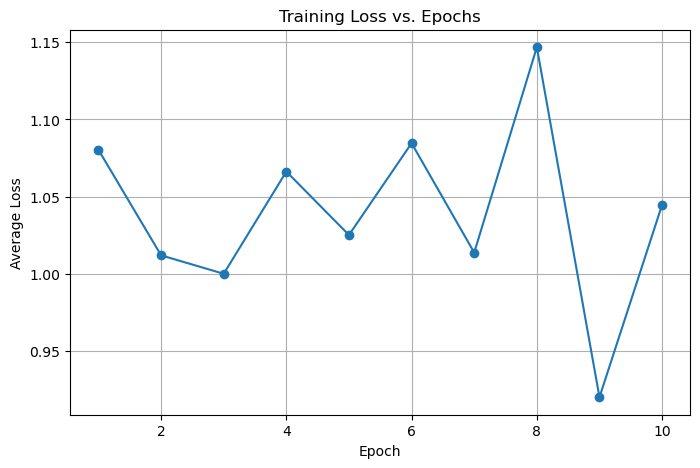

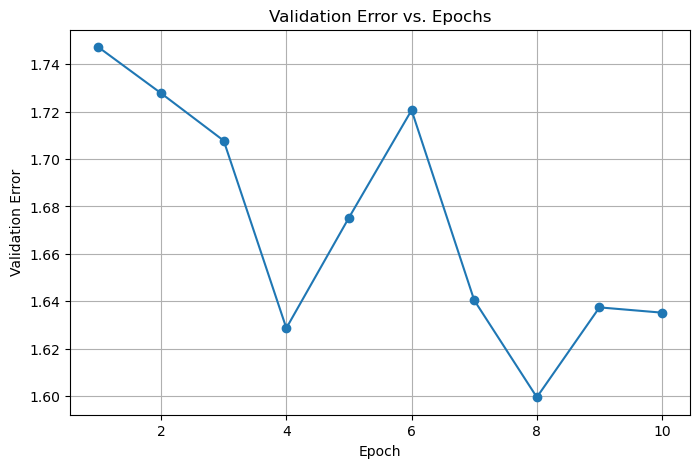

In [12]:
# model = network.SCNN_Video_Tracker_Class(trainset.image_shape, bins_factor=1, weighted_avg=True).to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.001)
model.start_training(trainloader, optimizer, device, validationloader=testloader, num_steps=10, num_epochs=10) # 30+10+10

# I have to try with a smaller learning rate, and also to train it with classification and midway switch to regression.

In [15]:
network.save_model(model)

Model saved at models/VideoTrackerClassWAvg_q8_10ts_50e.pt


In [16]:
model = network.SCNN_Video_Tracker_Class(trainset.image_shape, bins_factor=1, weighted_avg=True).to(device)
model.load_state_dict(torch.load('models/VideoTrackerClass_q8_10ts_30e.pt')['model_state_dict'])
model.evaluate(testloader, device, num_steps=10, operation='mean')

Flattened feature size: 3840
Number of x and y bins: 85, 51


C:\Users\realenriquem\AppData\Local\Temp\ipykernel_2516\37511473.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/VideoTrackerCla

(np.float64(1.068545050654851), np.float64(1.2467680653781756))

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1497: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Flattened feature size: 3840
Number of x and y bins: 85, 51
Error at 1 timesteps: 3.5874992999203847
Error at 2 timesteps: 2.629898079804773
Error at 3 timesteps: 2.144608906027652
Error at 4 timesteps: 1.8748069230505737
Error at 5 timesteps: 1.8684201235702902
Error at 6 timesteps: 1.8366698367849656
Error at 7 timesteps: 1.7067594174924379
Error at 8 timesteps: 1.6639195951261319
Error at 9 timesteps: 1.6488980163916276
Error at 10 timesteps: 1.6352076700319567
Error at 11 timesteps: 1.66292167594145
Error at 12 timesteps: 1.6494792143920431
Error at 13 timesteps: 1.6397695130451455
Error at 14 timesteps: 1.6532576910159822
Error at 15 timesteps: 1.624767115654306
Error at 16 timesteps: 1.641075435499562
Error at 17 timesteps: 1.6381529002558621
Error at 18 timesteps: 1.6213551973361249
Error at 19 timesteps: 1.6382404789917888


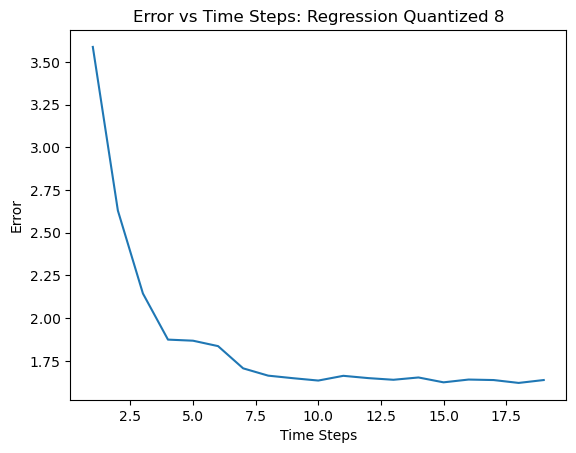

In [6]:
model = network.load_model('models/VideoTrackerClassWAvg_q8_10ts_50e.pt', network.SCNN_Video_Tracker_Class, device)
network.plot_timestep_curve(model, testloader, device, identifier="Regression Quantized 8", regression=True, interval = [1, 20, 1])

## Evaluate Weighted Average During Training and Inference

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1497: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Flattened feature size: 3840
Number of x and y bins: 85, 51
Error at 1 timesteps: 3.5874992999203847
Error at 2 timesteps: 2.629898079804773
Error at 3 timesteps: 2.144608906027652
Error at 4 timesteps: 1.8748069230505737
Error at 5 timesteps: 1.8684201235702902
Error at 6 timesteps: 1.8366698367849656
Error at 7 timesteps: 1.7067594174924379
Error at 8 timesteps: 1.6639195951261319
Error at 9 timesteps: 1.6488980163916276
Error at 10 timesteps: 1.6352076700319567
Error at 11 timesteps: 1.66292167594145
Error at 12 timesteps: 1.6494792143920431
Error at 13 timesteps: 1.6397695130451455
Error at 14 timesteps: 1.6532576910159822
Error at 15 timesteps: 1.624767115654306
Error at 16 timesteps: 1.641075435499562
Error at 17 timesteps: 1.6381529002558621
Error at 18 timesteps: 1.6213551973361249
Error at 19 timesteps: 1.6382404789917888
Error at 1 timesteps: 5.166105636970796
Error at 2 timesteps: 4.424673721118112
Error at 3 timesteps: 4.031869670461277
Error at 4 timesteps: 4.2084654602484

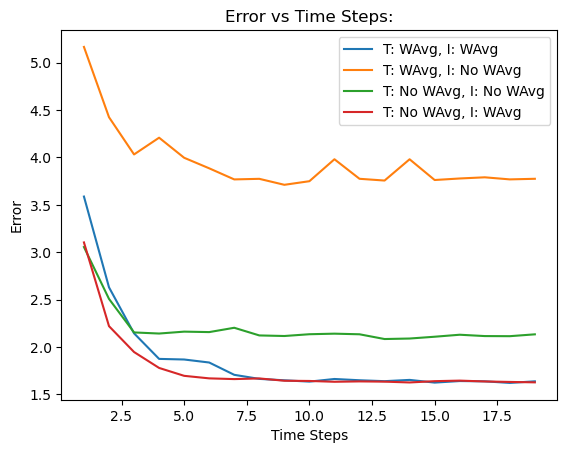

In [14]:
model1 = network.load_model('models/VideoTrackerClassWAvg_q8_10ts_50e.pt', network.SCNN_Video_Tracker_Class, device)
network.plot_timestep_curve(model1, testloader, device, identifier="T: WAvg, I: WAvg", regression=True, interval = [1, 20, 1])
model1.weighted_avg = False
network.plot_timestep_curve(model1, testloader, device, identifier="T: WAvg, I: No WAvg", regression=True, interval = [1, 20, 1])
model2 = network.load_model('models/VideoTrackerClass_q8_10ts_30e.pt', network.SCNN_Video_Tracker_Class, device)
network.plot_timestep_curve(model2, testloader, device, identifier="T: No WAvg, I: No WAvg", regression=True, interval = [1, 20, 1])
model2.weighted_avg = True
network.plot_timestep_curve(model2, testloader, device, identifier="T: No WAvg, I: WAvg", regression=True, interval = [1, 20, 1])
plt.legend()

In [13]:
inferenceloader = DataLoader(trainset, batch_size=1, collate_fn=testset.collate_fn, shuffle=False)
network.measure_inference_time_per_image_for_videos(model1, inferenceloader, device, num_steps=6)
network.measure_inference_time_per_image_for_videos(model2, inferenceloader, device, num_steps=6)

Average inference time per image over 10 batches: 0.012813 seconds
Average inference time per image over 10 batches: 0.011986 seconds


tensor(0.0120, device='cuda:0')

In [26]:
model = network.SCNN_Video_Tracker_Class(trainset.image_shape, bins_factor=1, weighted_avg=False).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
network.training_loop_videos(model, trainloader, optimizer, device, network.pinn_loss, validationloader=testloader, num_steps=1, num_epochs=20)

Flattened feature size: 3840
Number of x and y bins: 85, 51
preds_x.shape = torch.Size([3, 85])
preds_y.shape = torch.Size([3, 85])
L_data.requires_grad = True
L_phys.requires_grad = True
loss.requires_grad = True
logits_x.requires_grad = True
preds_x.shape = torch.Size([3, 106])
preds_y.shape = torch.Size([3, 106])
L_data.requires_grad = True
L_phys.requires_grad = True
loss.requires_grad = True
logits_x.requires_grad = True
preds_x.shape = torch.Size([3, 98])
preds_y.shape = torch.Size([3, 98])
L_data.requires_grad = True
L_phys.requires_grad = True
loss.requires_grad = True
logits_x.requires_grad = True
preds_x.shape = torch.Size([3, 129])
preds_y.shape = torch.Size([3, 129])
L_data.requires_grad = True
L_phys.requires_grad = True
loss.requires_grad = True
logits_x.requires_grad = True
Epoch 1/20, Loss: 2882.3425, Validation Error: 35.3246 pixels
preds_x.shape = torch.Size([3, 98])
preds_y.shape = torch.Size([3, 98])
L_data.requires_grad = True
L_phys.requires_grad = True
loss.requi

KeyboardInterrupt: 

Error at 1 timesteps: 3.4870833823652148
Error at 2 timesteps: 3.0520030470933066
Error at 3 timesteps: 2.3560300767283446
Error at 4 timesteps: 2.2865604593953113
Error at 5 timesteps: 2.26417814913304
Error at 6 timesteps: 2.3078541625222018
Error at 7 timesteps: 2.2794330654450183
Error at 8 timesteps: 2.2895941421895922
Error at 9 timesteps: 2.2922617784982426
Error at 10 timesteps: 2.2836989559665746
Error at 11 timesteps: 2.2893634597970176
Error at 12 timesteps: 2.29528792586959
Error at 13 timesteps: 2.275181284374228
Error at 14 timesteps: 2.275181284374228
Error at 15 timesteps: 2.2797309447440326
Error at 16 timesteps: 2.2568129225025917
Error at 17 timesteps: 2.2780424470306335
Error at 18 timesteps: 2.299294717818129
Error at 19 timesteps: 2.282332975416494


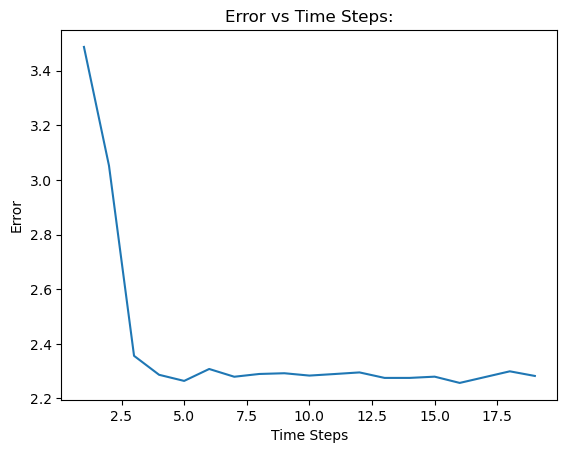

In [19]:
network.plot_timestep_curve(model, testloader, device, interval=[1, 20, 1], regression=True)